In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as pl
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("winequalityN.csv")

In [4]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


In [6]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [7]:
fig = px.histogram(df,x='quality')
fig.show()

<AxesSubplot:>

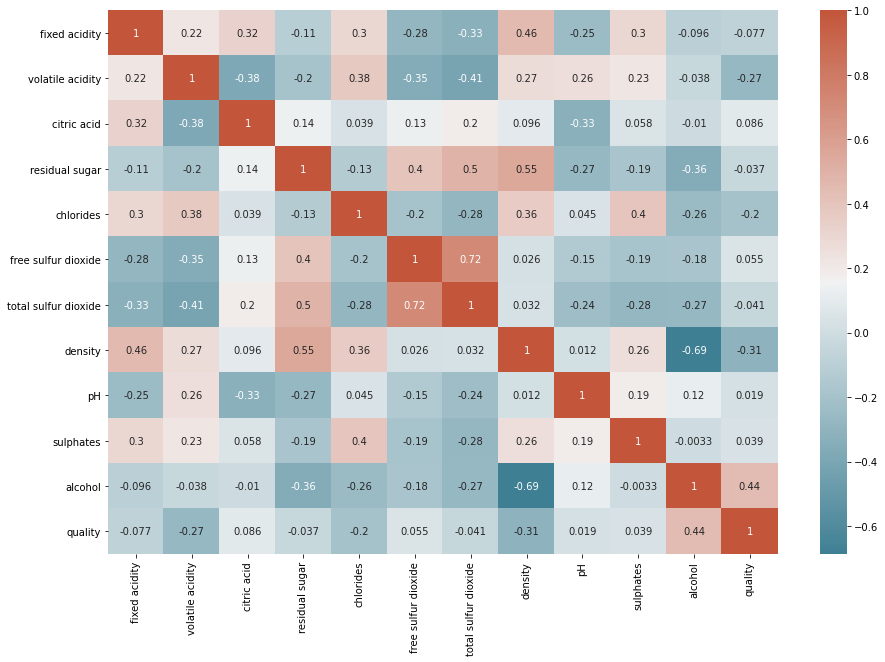

In [8]:
corr = df.corr()
pl.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

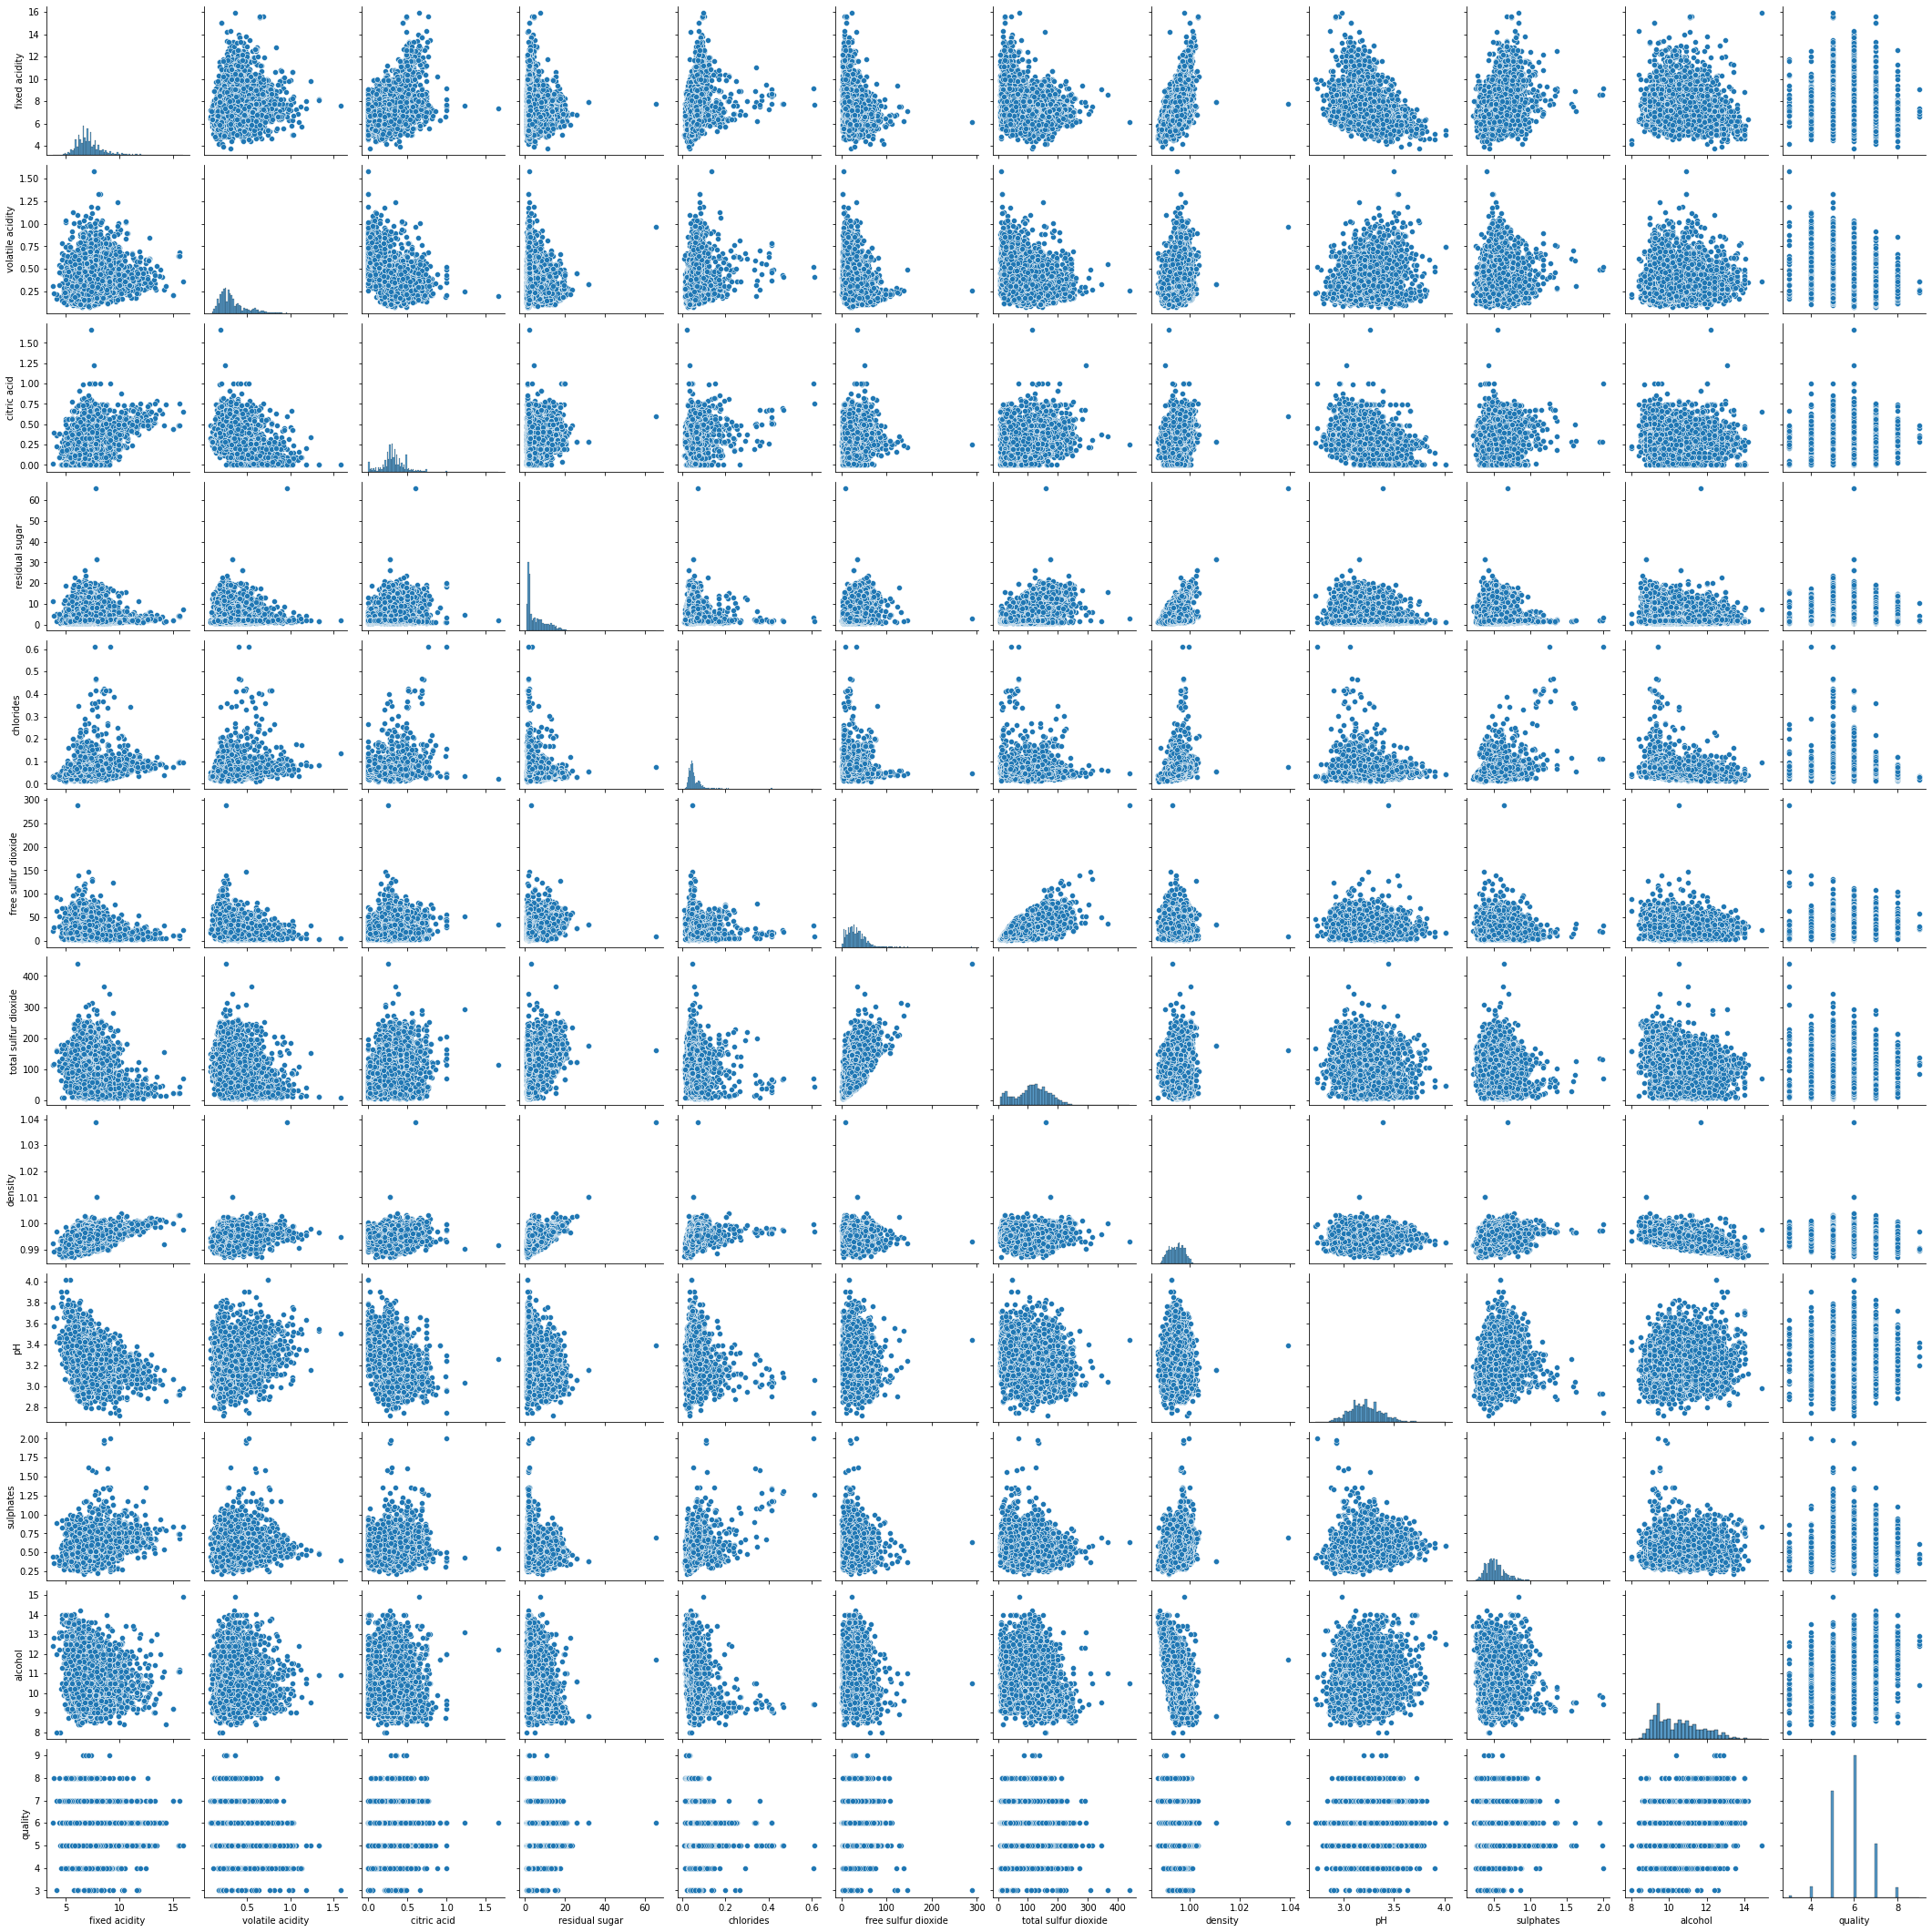

In [9]:
sns.pairplot(df)

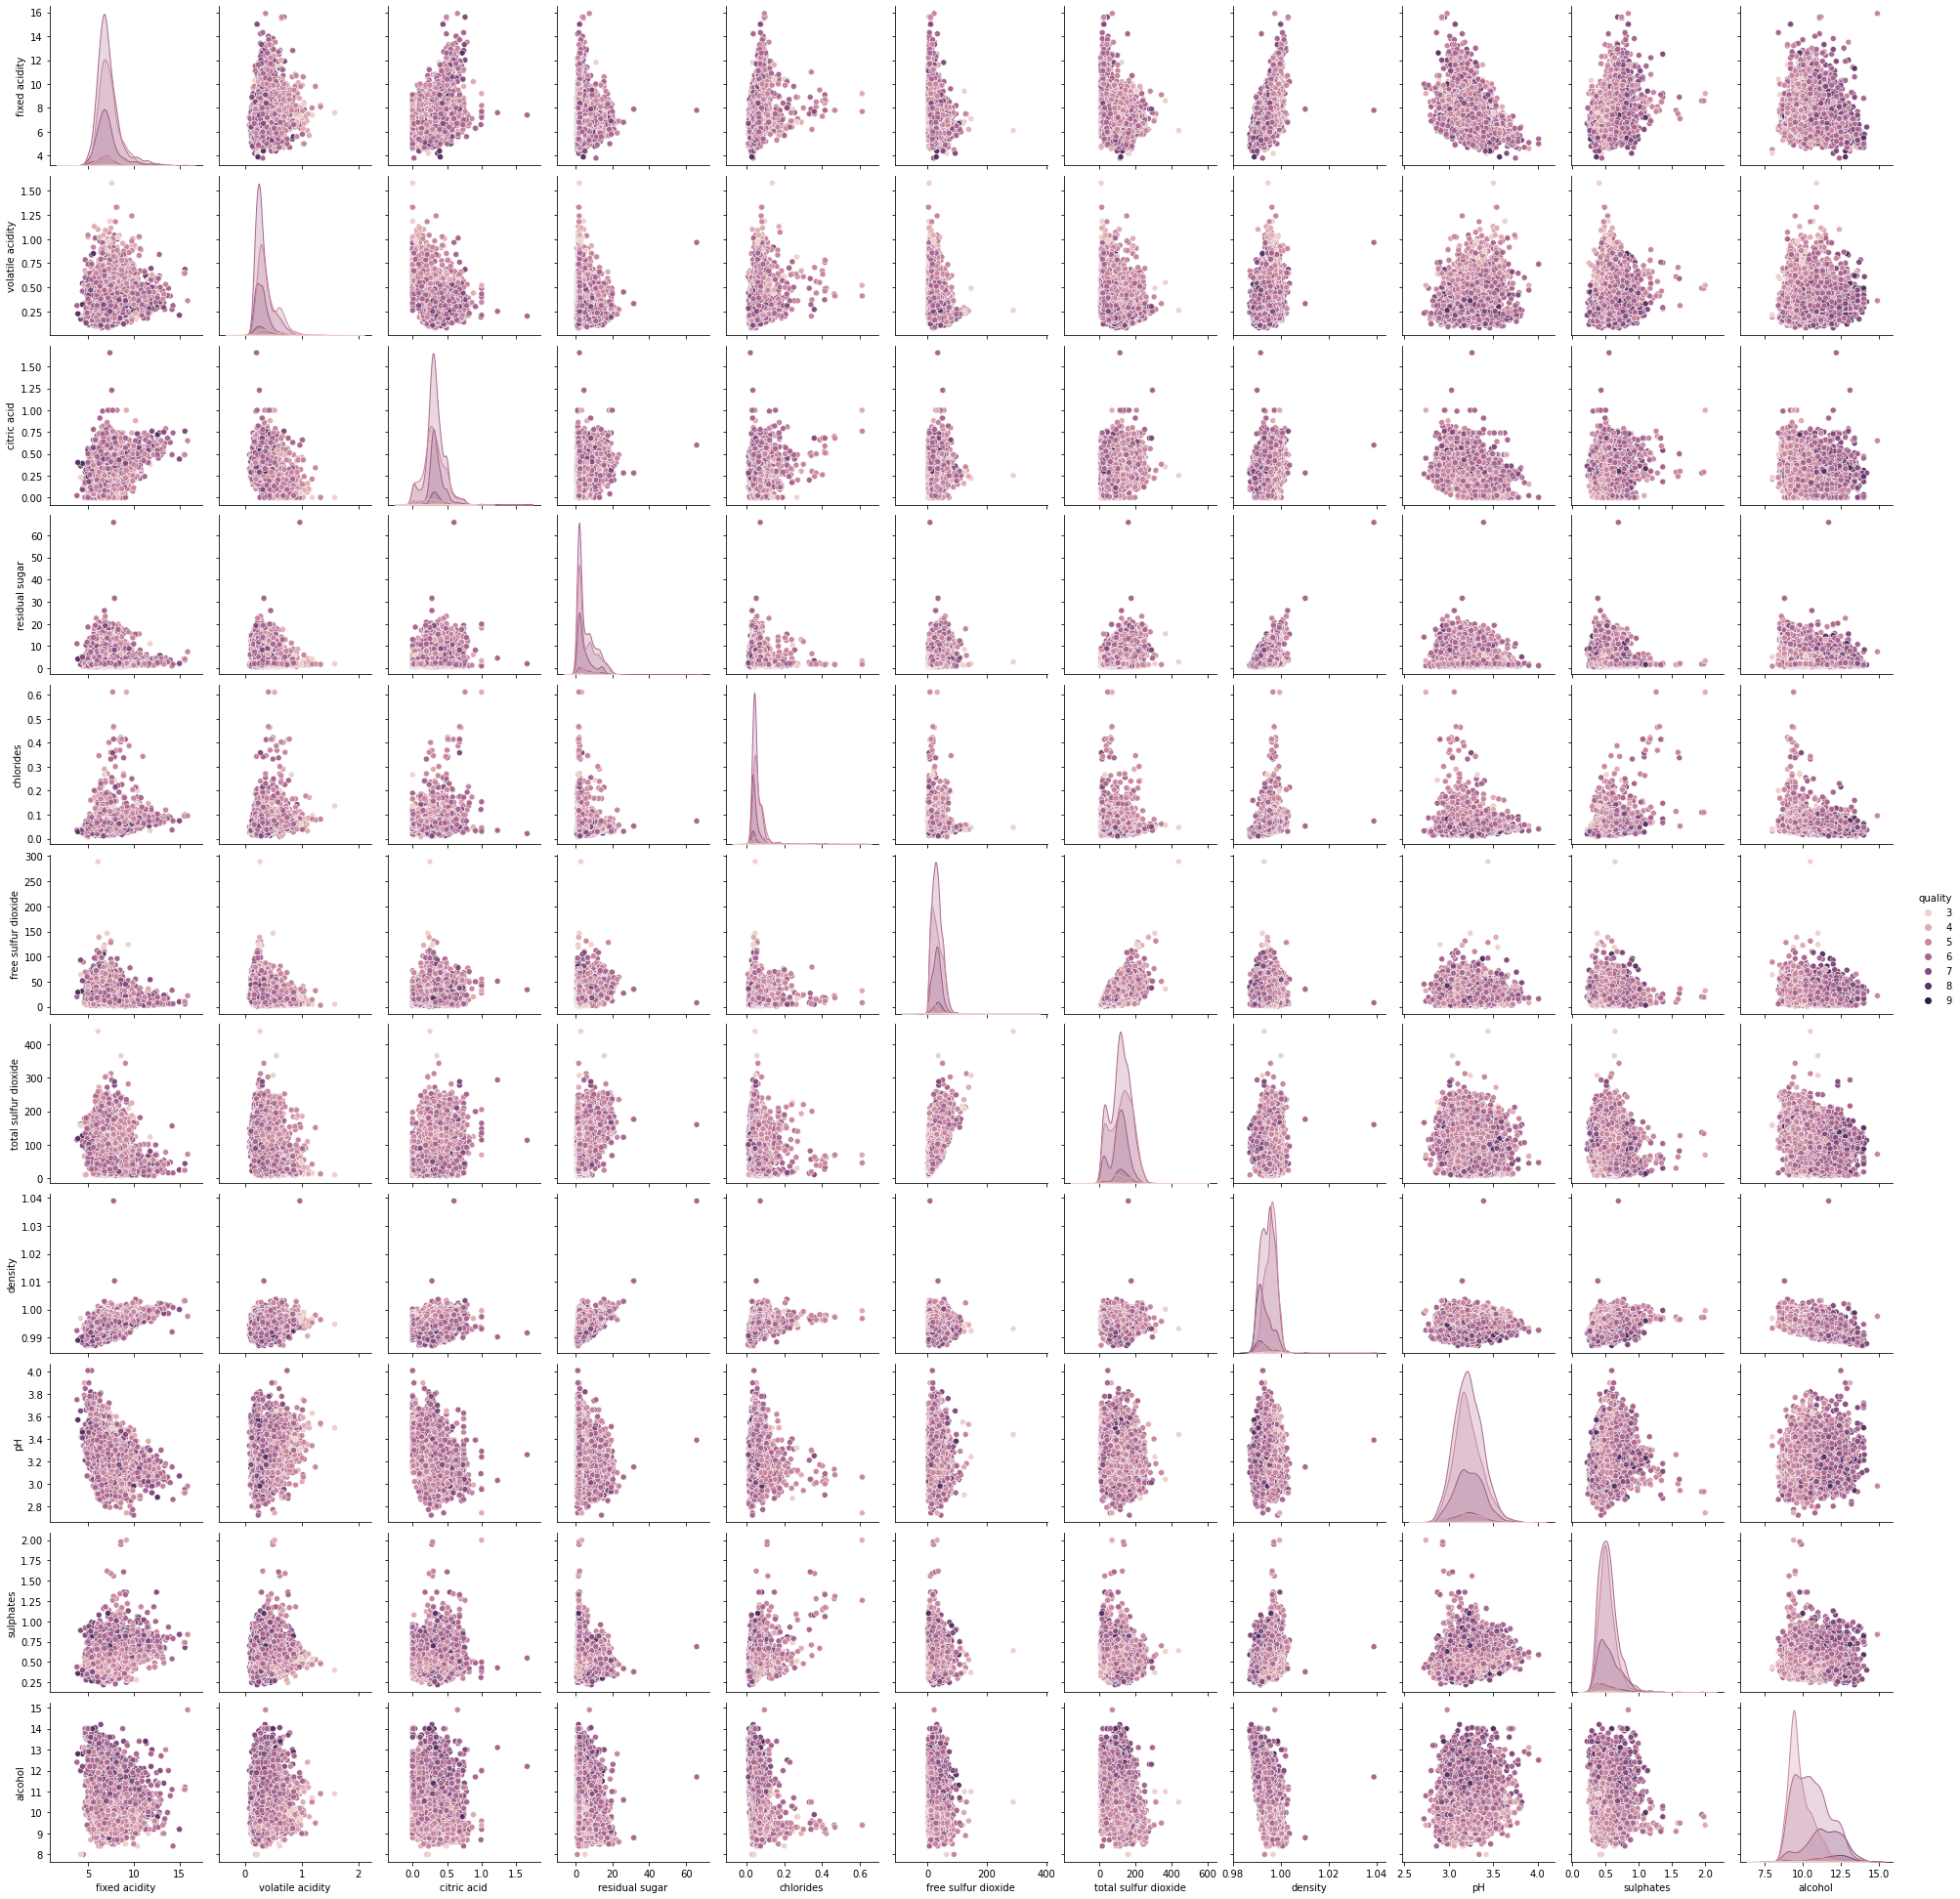

In [10]:
sns.pairplot(df, hue = "quality")

In [9]:
df.groupby("type")["quality"].describe()

count      mean       std  min  25%  50%  75%  max
type                                                      
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0

Volatile acidity and residual sugar are both not very impact full of the quality of wine. I wont use the features in KNN and Logistic Regression models. In Random Forest model i will pass these features to model, but I will use the "max_features" hyperparameter for this model. Feature "type" has some effect on wine quality, so I will use One Hot Encoding for this feature. Also I will use scaling for Logistic Regression, because it will increase the accuracy of that model.

# Feature Engineering

In [4]:
enc = OneHotEncoder(handle_unknown='ignore')
one = enc.fit_transform(df[["type"]]).toarray()
print(one)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [5]:
df.insert(0, "red", one[:, 0] , True)
df.insert(0, "white", one[:, 1] , True)
df

white  red   type  fixed acidity  volatile acidity  citric acid  \
0       1.0  0.0  white            7.0             0.270         0.36   
1       1.0  0.0  white            6.3             0.300         0.34   
2       1.0  0.0  white            8.1             0.280         0.40   
3       1.0  0.0  white            7.2             0.230         0.32   
4       1.0  0.0  white            7.2             0.230         0.32   
...     ...  ...    ...            ...               ...          ...   
6492    0.0  1.0    red            6.2             0.600         0.08   
6493    0.0  1.0    red            5.9             0.550         0.10   
6494    0.0  1.0    red            6.3             0.510         0.13   
6495    0.0  1.0    red            5.9             0.645         0.12   
6496    0.0  1.0    red            6.0             0.310         0.47   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0               20.7      0.045                 45.0                 170.0   
1                1.6      0.049                 14.0                 132.0   
2                6.9      0.050                 30.0                  97.0   
3                8.5      0.058                 47.0                 186.0   
4                8.5      0.058                 47.0                 186.0   
...              ...        ...                  ...                   ...   
6492             2.0      0.090                 32.0                  44.0   
6493             2.2      0.062                 39.0                  51.0   
6494             2.3      0.076                 29.0                  40.0   
6495             2.0      0.075                 32.0                  44.0   
6496             3.6      0.067                 18.0                  42.0   

      density    pH  sulphates  alcohol  quality  
0     1.00100  3.00       0.45      8.8        6  
1     0.99400  3.30       0.49      9.5        6  
2     0.99510  3.26       0.44     10.1        6  
3     0.99560  3.19       0.40      9.9        6  
4     0.99560  3.19       0.40      9.9        6  
...       ...   ...        ...      ...      ...  
6492  0.99490  3.45       0.58     10.5        5  
6493  0.99512  3.52        NaN     11.2        6  
6494  0.99574  3.42       0.75     11.0        6  
6495  0.99547  3.57       0.71     10.2        5  
6496  0.99549  3.39       0.66     11.0        6  

[6497 rows x 15 columns]

In [6]:
df = df.fillna(0)

In [7]:
df = df.drop(["type"], axis = 1)

In [22]:
X = df.drop('quality',
  axis='columns')
y = df["quality"]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Models

In [24]:
clf = RandomForestClassifier(n_estimators = 110, max_depth=18, max_features = 11,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6946153846153846


In [25]:
log_X = df[["alcohol", "density", "volatile acidity", "chlorides", "citric acid"]]
log_y = df["quality"]

In [26]:
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X, log_y,test_size=0.2, random_state=42)

In [27]:
sc = StandardScaler()
X_train_log = sc.fit_transform(log_X_train)
X_test_log = sc.transform(log_X_test)

In [28]:
lgclf = LogisticRegression(random_state = 0).fit(X_train_log, log_y_train)
y_pred_lg = lgclf.predict(X_test_log)
print("Accuracy:",metrics.accuracy_score(log_y_test, y_pred_lg))

Accuracy: 0.5392307692307692


In [29]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(log_X_train, log_y_train)

print("Accuracy:",metrics.accuracy_score(model.predict(log_X_test), log_y_test))


Accuracy: 0.6038461538461538


# Conclusion

For classifying the wine quality, I have implemented
multiple algorithms, namely
1. Logistic Regression
2. Random Forest
3. KNN

Random Forest gived the highest accuracy(69.5 %), which is high enough because the problem was 10 class classification.